# **DSFM Illustration**: Bias-Variance tradeoff

Creator: [Data Science for Managers - EPFL Program](https://www.dsfm.ch)  
Source:  [https://github.com/dsfm-org/code-bank.git](https://github.com/dsfm-org/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

-------------

## Overview

This illustration shows how __Bias__ and __Variance__ change as a linear regression is expanded with polynomial terms. 

We first define a __Data Generating Process__ (DGP), and then draw repeated samples from the DGP, to show the degree of __Bias__ and __Variance__ of the model at a given value of X -- and then how those vary as the model is made more complex through additional polynomial expansion.  

-------------

## **Part 0**: Setup

In [1]:
# Import all packages 

import matplotlib 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from IPython.display import clear_output
import math 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline


In [2]:
# define all constants

DRAWS     = 10    # number of draws
X0        = 3     # value of the arbitrary point where bias will be measured
NOISE     = 0.2   # offset for draw from uniform distribution 
DEGREE    = 4     # highest (up to) degree of polynomial 

# plotting
SLEEP      = 0.75 # sleep time in seconds
FONTSIZE   = 20
OFFSET     = 0.1  # plot offset on x and y axes

In [3]:
# Function to plot an example
def myPlot(X, y, y_pred, draw, symbol = 'o'):
    
    font = {'size'   : FONTSIZE}
    matplotlib.rc('font', **font)
    
    plt.figure(figsize=(16, 12))
    plt.plot(X, y, symbol, markersize=12, linewidth=3, label='Ground truth')
    plt.ylim(0 - OFFSET, 1 + OFFSET)
    plt.xlim(min(X) - OFFSET, max(X) + OFFSET)
    plt.hlines(0, xmin = min(X), xmax = max(X), colors='black', linewidth=3)
    plt.hlines(1, xmin = min(X), xmax = max(X), colors='black', linewidth=3)
    
    if type(y_pred) == float:
        plt.hlines(y_pred, xmin = min(X), xmax = max(X), colors='red', linestyles='dashed', linewidth=3)
    if type(y_pred) == np.ndarray:
        plt.plot(X, y_pred, '-', markersize = 12, linewidth=3, color = 'red')
        
    plt.ylabel('y')
    plt.xlabel('X')
    plt.title('Draw: {}'.format(draw))
    
    return plt


## **Part 1**: Define the data generating process (DGP)

We define the DGP to be the logistic sigmoid function, as shown below:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

In [4]:
# Function for the DGP
def sigmoid(x):
    y = 1 / (1 + math.exp(-x))
    return y

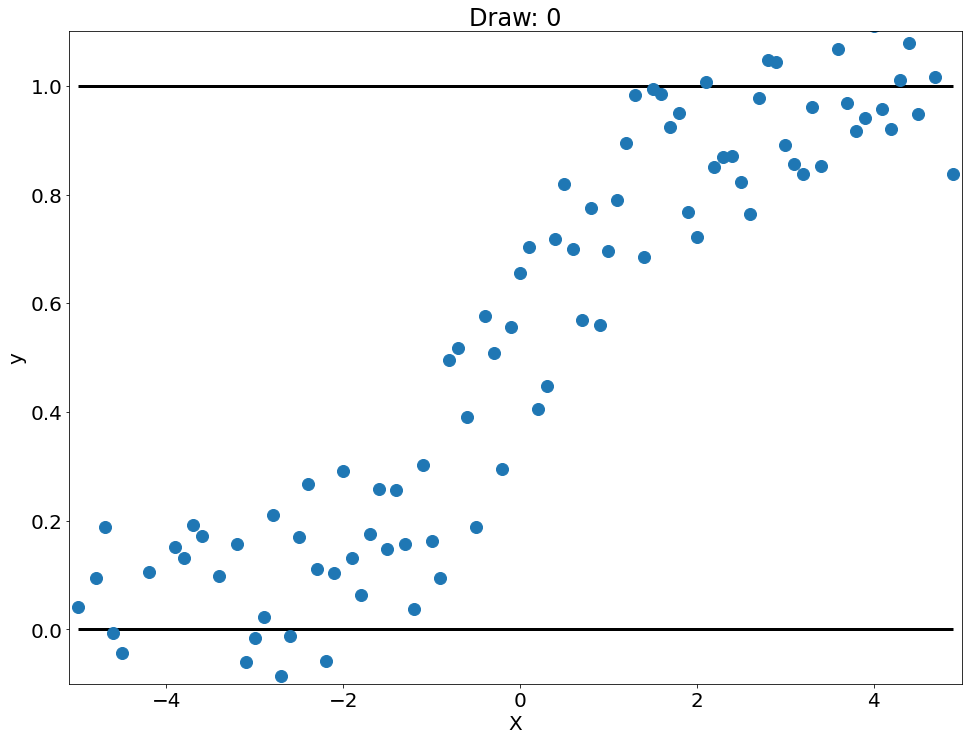

In [5]:
# Plot one draw from the DGP
X = list(range(-50, 50))
X = [i/10 for i in X]
y_DGP = [sigmoid(i) for i in X]
y = [i + np.random.uniform(-NOISE, +NOISE) for i in y_DGP]
myPlot(X, y, None, 0)
plt.show()

## **Part 2**: Repeatedly resample from DGP and measure bias/variance at an arbitrary point

### a) Our most simple prediction: __The Mean__

The simplest "model" predicts the mean of the outcome variable. The estimates have very high bias, very low variance. 

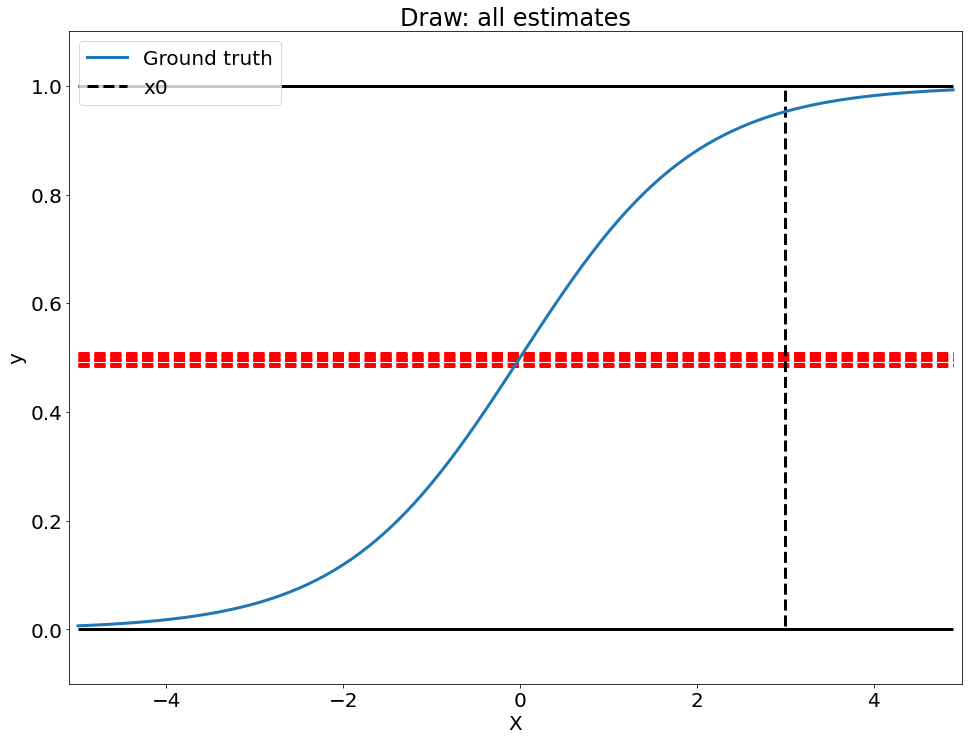

In [6]:
bias_variance = dict()

biases = []
estimates = []

# animate draws and estimates
for draw in range(DRAWS):
        
    # draw new data
    y_DGP = [sigmoid(i) for i in X]
    y = [i + np.random.uniform(-NOISE, +NOISE) for i in y_DGP]
    
    # estimate simple mean
    y_pred = sum(y)/len(y)
    biases.append(y_pred - sigmoid(X0))
    estimates.append(y_pred)

    # plot draw 
    p = myPlot(X, y, False, draw)
    for est in estimates[:-1]:
        p.hlines(est, xmin = min(X), xmax = max(X), colors='gray', linestyles='dashed', linewidth=2)
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
    # plot estimate 
    p = myPlot(X, y, y_pred, draw)
    for est in estimates[:-1]:
        p.hlines(est, xmin = min(X), xmax = max(X), colors='gray', linestyles='dashed', linewidth=2)
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
# plot all estimates

y = [sigmoid(i) for i in X]
plt = myPlot(X, y, False, 'all estimates', '-')

for est in estimates:
    plt.hlines(est, xmin = min(X), xmax = max(X), colors='red', linestyles='dashed', linewidth=3)
    
plt.vlines(X0, ymin = min(y), ymax = max(y), colors='black', linestyles='dashed', label = 'x0', linewidth=3)
plt.legend()


In [7]:
print('Mean Bias at point X0: {}'.format(round(abs(np.mean(biases)), 4)))
print('Variance at point X0: {}'.format(round(np.var(estimates), 4)))

# add to global dictionary
bias_variance[0] = ('mean bias', 'variance')
bias_variance['mean'] = (round(abs(np.mean(biases)), 4), round(np.var(estimates), 4))

Mean Bias at point X0: 0.4559
Variance at point X0: 0.0001


### b) A slightly more complex prediction: __A Line__ 

A linear regression model fits a linear line of best fit. The estimates have high bias, moderate variance. 

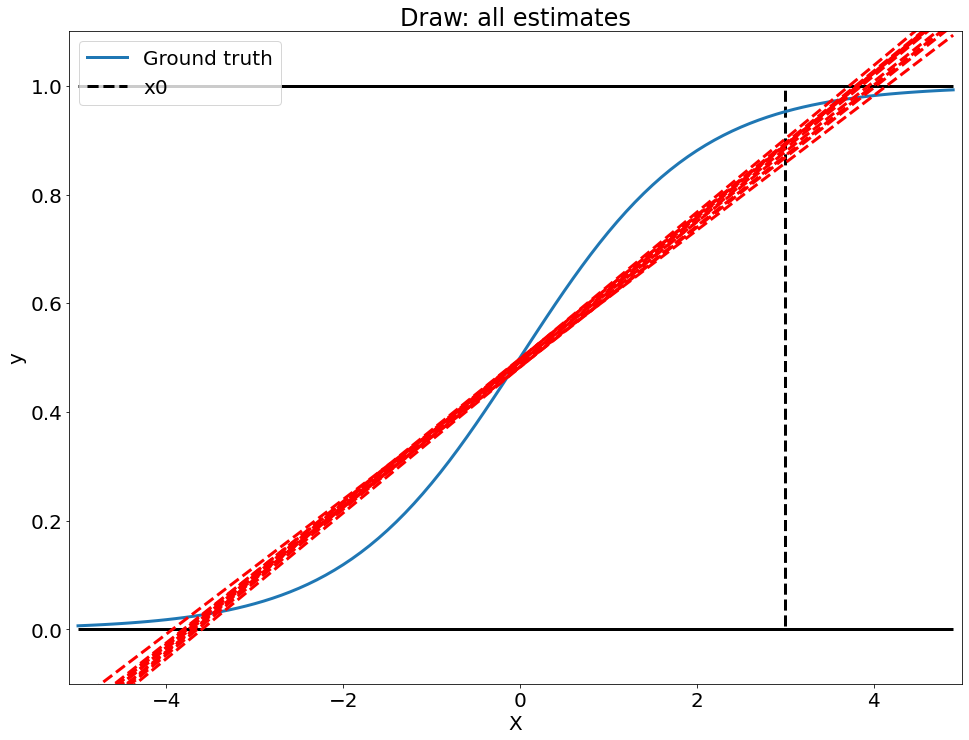

In [8]:
biases = []
estimates = []

# animate draws and estimates

for draw in range(DRAWS):
        
    # draw new data
    y_DGP = [sigmoid(i) for i in X]
    y = [i + np.random.uniform(-NOISE, +NOISE) for i in y_DGP]

    # estimate simple mean
    model = LinearRegression().fit(np.array(X).reshape(-1, 1), y)
    y_pred = model.predict(np.array(X).reshape(-1, 1))
    
    biases.append(y_pred[X.index(X0)] - sigmoid(X0))
    estimates.append(y_pred)

    # plot draw 
    p = myPlot(X, y, False, draw)
    for est in estimates[:-1]:
        plt.plot(X, est, markersize = 12, linewidth=2, color = 'gray', linestyle='dashed')
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
    # plot estimate 
    p = myPlot(X, y, y_pred, draw)
    for est in estimates[:-1]:
        plt.plot(X, est, markersize = 12, linewidth=2, color = 'gray', linestyle='dashed')
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
# plot all estimates

y = [sigmoid(i) for i in X]
plt = myPlot(X, y, False, 'all estimates', '-')

for est in estimates:
    plt.plot(X, est, markersize = 12, linewidth=3, color = 'red', linestyle='dashed')
    
plt.vlines(X0, ymin = min(y), ymax = max(y), colors='black', linestyles='dashed', label = 'x0', linewidth=3)
plt.legend()


In [9]:
print('Mean Bias at point X0: {}'.format(round(abs(np.mean(biases)), 4)))
print('Variance at point X0: {}'.format(round(np.var(estimates), 4)))

# add to global dictionary
bias_variance['line'] = (round(abs(np.mean(biases)), 4), round(np.var(estimates), 4))

Mean Bias at point X0: 0.0695
Variance at point X0: 0.1431


### c) An even more complex prediction: __A Higher-Order Polynomial__

A nonlinear model has the most flexibility to fit its parameters to the data. The estimates have low bias, very high variance. 

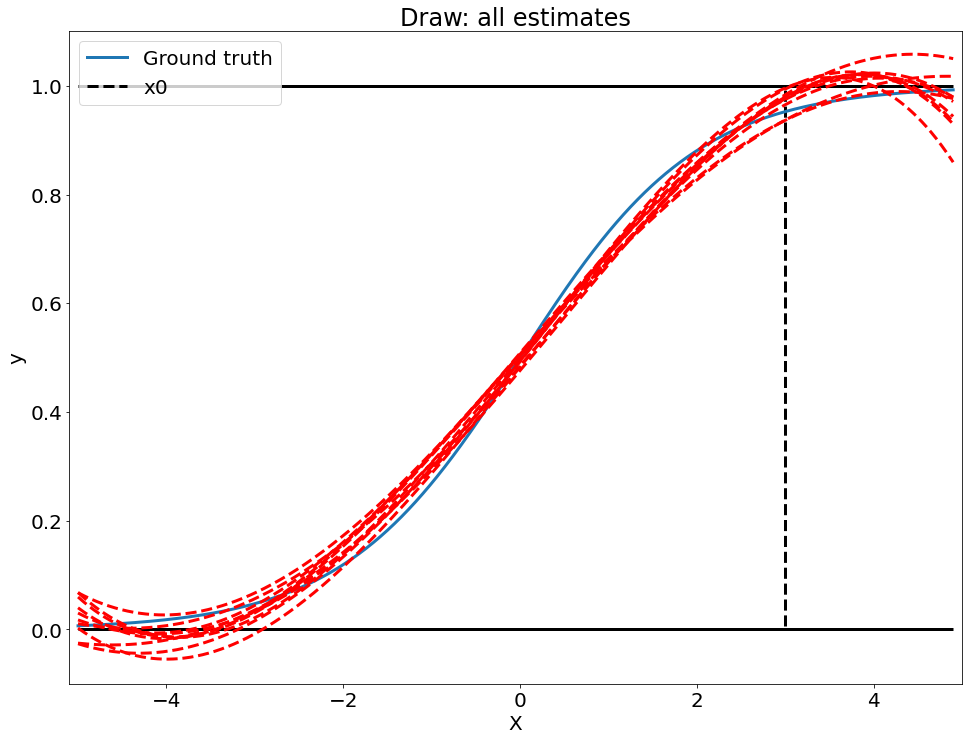

In [10]:
biases = []
estimates = []

# animate draws and estimates

for draw in range(DRAWS):
        
    # draw new data
    y_DGP = [sigmoid(i) for i in X]
    y = [i + np.random.uniform(-NOISE, +NOISE) for i in y_DGP]
    
    # estimate polynomial 
    polynomial = PolynomialFeatures(degree=DEGREE, include_bias=True)
    
    X_ = polynomial.fit_transform(np.array(X).reshape(-1, 1))
    model = LinearRegression().fit(X_, y)
    y_pred = model.predict(np.array(X_))
    
    biases.append(y_pred[X.index(X0)] - sigmoid(X0))
    
    # plot estimate 
    # compute smooth estimation lines
    X_smooth = list(range(-500, 491, 1))
    X_smooth = [i/100 for i in X_smooth]
    y_polynomial = [sigmoid(i) for i in X_smooth]
    X_polynomial = polynomial.transform(np.array(X_smooth).reshape(-1, 1))  # fit on only 10 datapoints
    y_polynomial_pred = model.predict(X_polynomial)
    estimates.append(y_polynomial_pred)

    # plot draw 
    p = myPlot(X, y, False, draw)
    for est in estimates[:-1]:
        p.plot(X_smooth, est, markersize = 12, linewidth=2, color = 'gray', linestyle='dashed')
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
    # fill y's with zeros (this is a hack)
    y_ = []
    for i in y:
        y_.append(i)
        if len(y_) < len(X_smooth):
            for j in range(9):
                y_.append(-1)
    # plot
    p = myPlot(X_smooth, y_, y_polynomial_pred, draw)
    for est in estimates[:-1]:
        p.plot(X_smooth, est, markersize = 12, linewidth=2, color = 'gray', linestyle='dashed')
    p.show()
    
    plt.pause(SLEEP)
    clear_output(wait = True)
    
# plot all estimates
y = [sigmoid(i) for i in X_smooth]
plt = myPlot(X_smooth, y, False, 'all estimates', '-')

for est in estimates:
    plt.plot(X_smooth, est, markersize = 12, linewidth=3, color = 'red', linestyle='dashed')
    
plt.vlines(X0, ymin = min(y), ymax = max(y), colors='black', linestyles='dashed', label = 'x0', linewidth=3)
plt.legend()


In [11]:
print('Mean Bias at point X0: {}'.format(round(abs(np.mean(biases)), 4)))
print('Variance at point X0: {}'.format(round(np.var(estimates), 4)))

# add to global dictionary
bias_variance['polynomial'] = (round(abs(np.mean(biases)), 4), round(np.var(estimates), 4))

Mean Bias at point X0: 0.0197
Variance at point X0: 0.1521


## **Part 3**: Summarize mean bias and variance

In [12]:
# tabulate mean bias and variance
pd.DataFrame.from_dict(bias_variance)

,0,mean,line,polynomial
0,mean bias,0.4559,0.0695,0.0197
1,variance,0.0001,0.1431,0.1521
